### Logistic Regression

In [2]:
import sklearn
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
iris=load_iris()
X=iris['data']
y=iris['target']

In [4]:
y.shape

(150,)

In [5]:
### Preprocess the Data
scaler=StandardScaler()
X=scaler.fit_transform(X)
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)


In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=32)

In [7]:
X_train.shape

torch.Size([120, 4])

In [8]:
class LogisticRegression(nn.Module):
  def __init__(self,n_features,h1):
    super(LogisticRegression,self).__init__()
    self.layer1=nn.Linear(n_features,h1)
    self.layer2=nn.Linear(h1,3)
    self.softmax=nn.Softmax(dim=1)

  def forward(self,x):
    out=F.relu(self.layer1(x))
    out=F.relu(self.layer2(out))
    out=self.softmax(out)
    return out

In [9]:

def train(model,X,y,epocs=50,optimizer=None,loss_fn=None,bsz=20,seed=20):
  torch.manual_seed(seed)
  cost=[]
  for epoch in range(epocs):
    suffle_idx=torch.randperm(y.size(0))
    batches =torch.split(suffle_idx,bsz)
    for batch_idx in batches:
      ###1. Compute the output
      yhat=model(X[batch_idx])

      ###2. Compute the error
    
      loss=loss_fn(yhat,y[batch_idx].long())

      ###3. Compute the Gradient
      optimizer.zero_grad()
      loss.backward()

      ###4. Update the Parameters
      optimizer.step()

      ### Log the loss
    with torch.no_grad():
      yhat=model(X)
      curr_loss=loss_fn(yhat,y.long())
      print('Epoch:%3d ' % epoch,end="")
      print('BCE %.2f' % curr_loss)
      cost.append(curr_loss)
  return cost





In [10]:
for i in range(100):
    print('Epoch:{}'.format(i), end="\n")


Epoch:0
Epoch:1
Epoch:2
Epoch:3
Epoch:4
Epoch:5
Epoch:6
Epoch:7
Epoch:8
Epoch:9
Epoch:10
Epoch:11
Epoch:12
Epoch:13
Epoch:14
Epoch:15
Epoch:16
Epoch:17
Epoch:18
Epoch:19
Epoch:20
Epoch:21
Epoch:22
Epoch:23
Epoch:24
Epoch:25
Epoch:26
Epoch:27
Epoch:28
Epoch:29
Epoch:30
Epoch:31
Epoch:32
Epoch:33
Epoch:34
Epoch:35
Epoch:36
Epoch:37
Epoch:38
Epoch:39
Epoch:40
Epoch:41
Epoch:42
Epoch:43
Epoch:44
Epoch:45
Epoch:46
Epoch:47
Epoch:48
Epoch:49
Epoch:50
Epoch:51
Epoch:52
Epoch:53
Epoch:54
Epoch:55
Epoch:56
Epoch:57
Epoch:58
Epoch:59
Epoch:60
Epoch:61
Epoch:62
Epoch:63
Epoch:64
Epoch:65
Epoch:66
Epoch:67
Epoch:68
Epoch:69
Epoch:70
Epoch:71
Epoch:72
Epoch:73
Epoch:74
Epoch:75
Epoch:76
Epoch:77
Epoch:78
Epoch:79
Epoch:80
Epoch:81
Epoch:82
Epoch:83
Epoch:84
Epoch:85
Epoch:86
Epoch:87
Epoch:88
Epoch:89
Epoch:90
Epoch:91
Epoch:92
Epoch:93
Epoch:94
Epoch:95
Epoch:96
Epoch:97
Epoch:98
Epoch:99


In [11]:
model=LogisticRegression(n_features=X_train.size(1),h1=20)
optimizer=torch.optim.Adam(model.parameters(),lr=.001)
loss_fn=nn.CrossEntropyLoss()

In [12]:
cost =train(model,X_train,y_train,optimizer=optimizer,loss_fn=loss_fn)

Epoch:  0 BCE 1.09
Epoch:  1 BCE 1.08
Epoch:  2 BCE 1.07
Epoch:  3 BCE 1.06
Epoch:  4 BCE 1.06
Epoch:  5 BCE 1.05
Epoch:  6 BCE 1.04
Epoch:  7 BCE 1.03
Epoch:  8 BCE 1.02
Epoch:  9 BCE 1.01
Epoch: 10 BCE 1.01
Epoch: 11 BCE 1.00
Epoch: 12 BCE 0.99
Epoch: 13 BCE 0.98
Epoch: 14 BCE 0.98
Epoch: 15 BCE 0.97
Epoch: 16 BCE 0.96
Epoch: 17 BCE 0.96
Epoch: 18 BCE 0.95
Epoch: 19 BCE 0.94
Epoch: 20 BCE 0.94
Epoch: 21 BCE 0.93
Epoch: 22 BCE 0.93
Epoch: 23 BCE 0.92
Epoch: 24 BCE 0.92
Epoch: 25 BCE 0.92
Epoch: 26 BCE 0.91
Epoch: 27 BCE 0.91
Epoch: 28 BCE 0.91
Epoch: 29 BCE 0.90
Epoch: 30 BCE 0.90
Epoch: 31 BCE 0.90
Epoch: 32 BCE 0.89
Epoch: 33 BCE 0.89
Epoch: 34 BCE 0.89
Epoch: 35 BCE 0.88
Epoch: 36 BCE 0.88
Epoch: 37 BCE 0.88
Epoch: 38 BCE 0.88
Epoch: 39 BCE 0.87
Epoch: 40 BCE 0.87
Epoch: 41 BCE 0.87
Epoch: 42 BCE 0.87
Epoch: 43 BCE 0.87
Epoch: 44 BCE 0.86
Epoch: 45 BCE 0.86
Epoch: 46 BCE 0.86
Epoch: 47 BCE 0.86
Epoch: 48 BCE 0.86
Epoch: 49 BCE 0.86


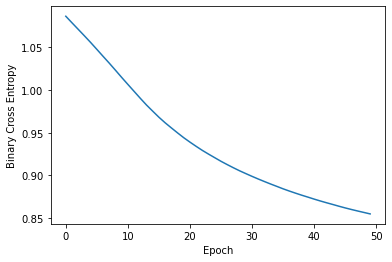

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost)),cost)
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch')
plt.show()

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
with torch.no_grad():
  train_pred=model(X_train)
  #train_pred
  train_acc=(torch.argmax(train_pred,dim=1)==y_train).float().mean()
  print('Training Accuracy: %.2f' %train_acc)
  test_pred=model(X_test)
  test_acc=(torch.argmax(test_pred,dim=1)==y_test).float().mean()
  print('Testing Accuracy: %.2f' %test_acc)

Training Accuracy: 0.66
Testing Accuracy: 0.70


### Multinomial Logistic Regression

In [16]:
import torch
import torchvision
import torchvision.transforms as transforms

In [17]:
transform=transforms.ToTensor()

### Data Loading
traindata = torchvision.datasets.EMNIST(
    root='./data', split="letters", train=True, download=True, transform=transform)
trainloader=torch.utils.data.DataLoader(traindata, batch_size=32, shuffle=False)

testdata = torchvision.datasets.EMNIST(root='./data', split = "letters", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testdata, batch_size=32, shuffle=False)

In [18]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
  img=img.numpy()
  img=np.transpose(img,(1,2,0))
  plt.imshow(img)
  plt.show()


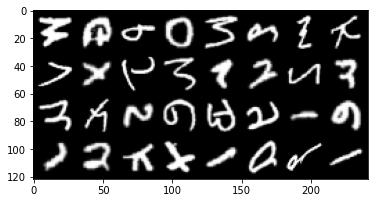

tensor([23,  7, 16, 15, 23, 17, 13, 11, 22, 24, 10, 14, 18, 21, 26, 21, 21, 24,
        19,  5,  2, 25,  9,  5, 10, 21, 11, 24, 12,  1, 17,  9])


In [19]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(labels)

In [20]:
images.view(images.size(0),-1).shape

torch.Size([32, 784])

In [21]:
print(images[0].shape)

torch.Size([1, 28, 28])


In [28]:
import torch.nn as nn
import torch.nn.functional as F
class LogisticNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(1*28*28,100)
    self.layer2=nn.Linear(100,30)
    self.layer3=nn.Linear(30,27)
    
  def forward(self,x):
    x=F.relu(self.layer1(x))
    x=F.relu(self.layer2(x))
    x=self.layer3(x)
    return x



model=LogisticNet()

In [23]:
model

LogisticNet(
  (layer1): Linear(in_features=784, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=30, bias=True)
  (layer3): Linear(in_features=30, out_features=10, bias=True)
)

In [24]:
import torch.optim as optim

In [29]:

def train_mnst(model,train_loader,test_loader,EPOCHS=100,lr=.001,seed=32):
  torch.manual_seed(seed)
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  cost=[]
  model.to(device)
  optimizer=optim.SGD(model.parameters(),lr=lr)
  loss_function = nn.CrossEntropyLoss()
  for epoch in range(EPOCHS):

    curr_loss=0.0
    currect=0.0
    t_currect=0.0
    for i,data in enumerate(train_loader,0):


      ## Get a Batch of Data
      input,target=data[0].to(device),data[1].to(device)
      ###1. Compute the output
     
      ###Flatten the input
      input=input.view(input.size(0),-1)
      yhat=model(input)
      
      ###2. Compute the loss
      loss=loss_function(yhat,target)
      

      ###3. Compute the gradient

      optimizer.zero_grad()
      loss.backward()
    
      ###4. Update the parameters

      optimizer.step()
      ### Log the record
      with torch.no_grad():
        yhat=model(input)
        err=loss_function(yhat,target)
        curr_loss+=err
        b_currect=((torch.argmax(yhat,dim=1)==target).sum()).float()
      
        currect+=b_currect
    ### Calculate the accuracy    
    with torch.no_grad():
      for data in test_loader:
          ims,lbs=data[0].to(device),data[1].to(device)
          pred=model(ims.view(ims.size(0),-1))
          t_currect+=(torch.argmax(pred,dim=1)==lbs).sum()
   
      print('Current Epoch: %3d' %(epoch+1),end="")
      print(' | Loss: %5.2f' %curr_loss,end="")
      accuracy=currect.sum()/len(traindata)*100
      test_accuracy=t_currect.sum()/len(testdata)*100
      #print(currect)
      print(' | Accuracy: %.2f' %accuracy,end="")
      print(' | Test Accuracy: %.2f' %test_accuracy )
  return cost
      

      


In [30]:
cost=train_mnst(model,trainloader,testloader,EPOCHS=30)

Current Epoch:   1 | Loss: 12735.16 | Accuracy: 10.19 | Test Accuracy: 13.09
Current Epoch:   2 | Loss: 12229.25 | Accuracy: 17.38 | Test Accuracy: 22.23


KeyboardInterrupt: 

In [ ]:
len(traindata)

60000

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
prob=model(images.view(32,-1).to(device))
(torch.argmax(prob,dim=1).to('cpu')==labels).sum().float()/32*100

tensor(93.7500)